In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.colormaps['PuBu']
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [46]:
covid_cleaned_data = pd.read_csv("../data/covid_CleanComplete.txt",parse_dates=['Date'])
covid_cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [5]:
#renaming columns for easy usage
covid_cleaned_data.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat','Long':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'deaths',
                  'Recovered':'recovered'}, inplace=True)

In [7]:
#active cases
covid_cleaned_data['active']=covid_cleaned_data['confirmed']-covid_cleaned_data['deaths']-covid_cleaned_data['recovered']


In [73]:
#combining the latest data for the countries (the max date)
top = covid_cleaned_data[covid_cleaned_data['date'] == covid_cleaned_data['date'].max()]
world = top[['country','confirmed','active','deaths']].groupby('country').sum().reset_index()
world.head()
# top.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


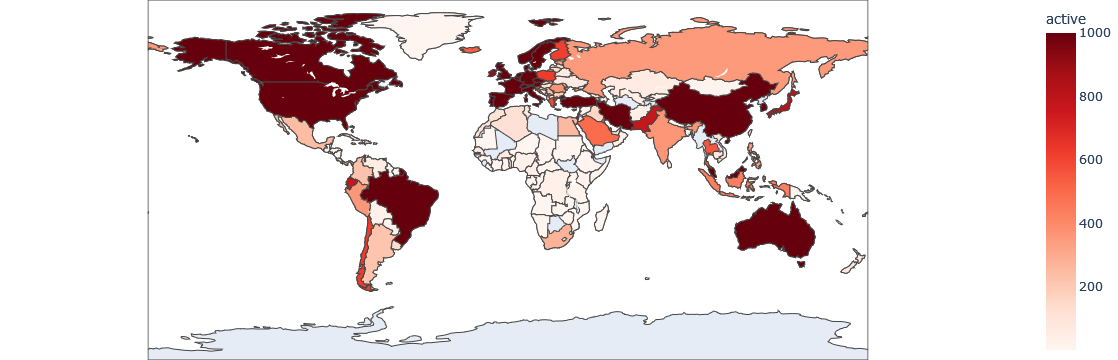

In [83]:
fig = px.choropleth(world,locations = 'country',
                      locationmode = 'country names', color='active',
                      hover_name='country', range_color=[1,1000],
                      color_continuous_scale="reds",
                      title = 'Countries with active cases')

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [85]:
#determine the total confirmed cases grouped by date
total_cases = covid_cleaned_data[['date','confirmed']].groupby('date').sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

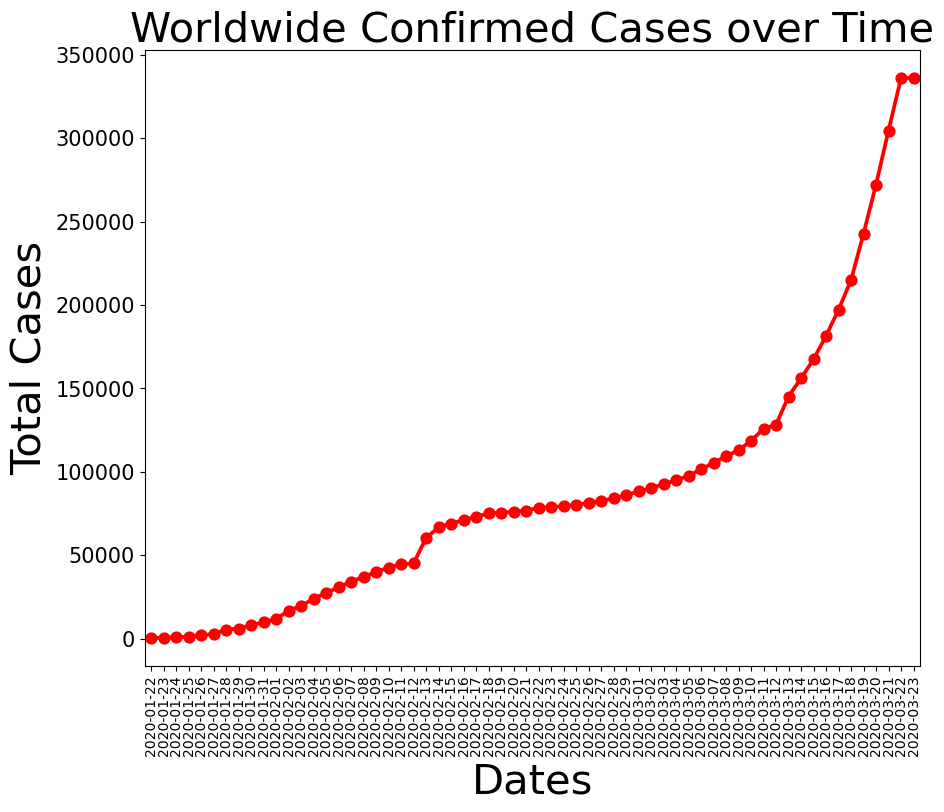

In [21]:
plt.figure(figsize=(10,8))
plt.xticks(rotation= 90,fontsize= 10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize= 30)
plt.ylabel("Total Cases",fontsize= 30)
plt.title("Worldwide Confirmed Cases over Time",fontsize= 30)

ax = sns.pointplot(x= total_cases.date.dt.date, y= total_cases.confirmed, color='r')
ax.set(xlabel='Dates',ylabel='Total Cases')

In [89]:
#current top countries having most active cases
top_active = top[['country','active']].groupby(by = 'country').sum().sort_values(by='active',ascending=False).head(20).reset_index()
top_active.head()

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

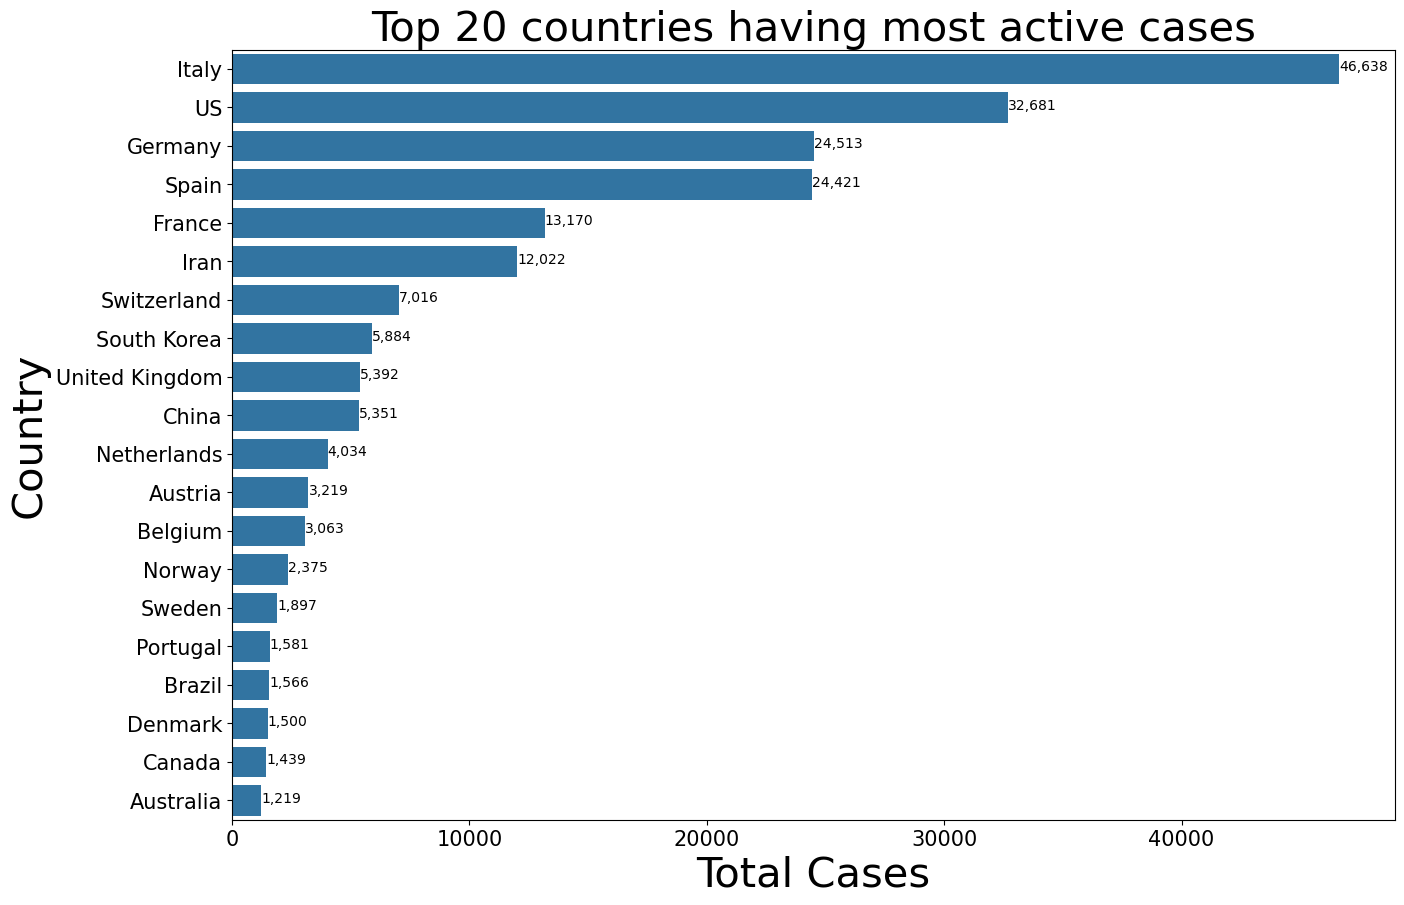

In [107]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize= 15)
plt.xlabel("total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)

ax = sns.barplot(x=top_active.active,y = top_active.country)

for i,(value,name) in enumerate(zip(top_active.active,top_active.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha ='left',va='center')
    
ax.set(xlabel='Total Cases',ylabel='Country')

In [170]:
#china based data
china = covid_cleaned_data[covid_cleaned_data['country']=='China']
china = china[['date','recovered','deaths','confirmed','active']].groupby('date').sum().reset_index()
china = china.iloc[9:].reset_index().drop('index',axis=1) #only zero tuples before this point
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,214.0,213.0,9802.0,9375.0
1,2020-02-01,275.0,259.0,11891.0,11357.0
2,2020-02-02,463.0,361.0,16630.0,15806.0
3,2020-02-03,614.0,425.0,19716.0,18677.0
4,2020-02-04,843.0,491.0,23707.0,22373.0


In [172]:
#US based data
us = covid_cleaned_data[covid_cleaned_data['country']=='US']
us = us[['date','recovered','deaths','confirmed','active']].groupby('date').sum().reset_index()
us = us.iloc[33:].reset_index().drop('index',axis=1) #only zero tuples before this row
us.head(10)

,date,recovered,deaths,confirmed,active
0,2020-02-24,0.0,0.0,36.0,36.0
1,2020-02-25,0.0,0.0,36.0,36.0
2,2020-02-26,0.0,0.0,42.0,42.0
3,2020-02-27,0.0,0.0,42.0,42.0
4,2020-02-28,0.0,0.0,44.0,44.0
5,2020-02-29,0.0,0.0,44.0,44.0
6,2020-03-01,0.0,0.0,44.0,44.0
7,2020-03-02,0.0,0.0,45.0,45.0
8,2020-03-03,0.0,0.0,45.0,45.0
9,2020-03-04,0.0,0.0,45.0,45.0


In [174]:
#indian data
india = covid_cleaned_data[covid_cleaned_data['country']=='India']
india = india[['date','recovered','deaths','confirmed','active']].groupby('date').sum().reset_index()
india = india.iloc[8:].reset_index().drop('index',axis=1) #only zero tuples before this row
india.head(10)

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0
5,2020-02-04,0.0,0.0,3.0,3.0
6,2020-02-05,0.0,0.0,3.0,3.0
7,2020-02-06,0.0,0.0,3.0,3.0
8,2020-02-07,0.0,0.0,3.0,3.0
9,2020-02-08,0.0,0.0,3.0,3.0


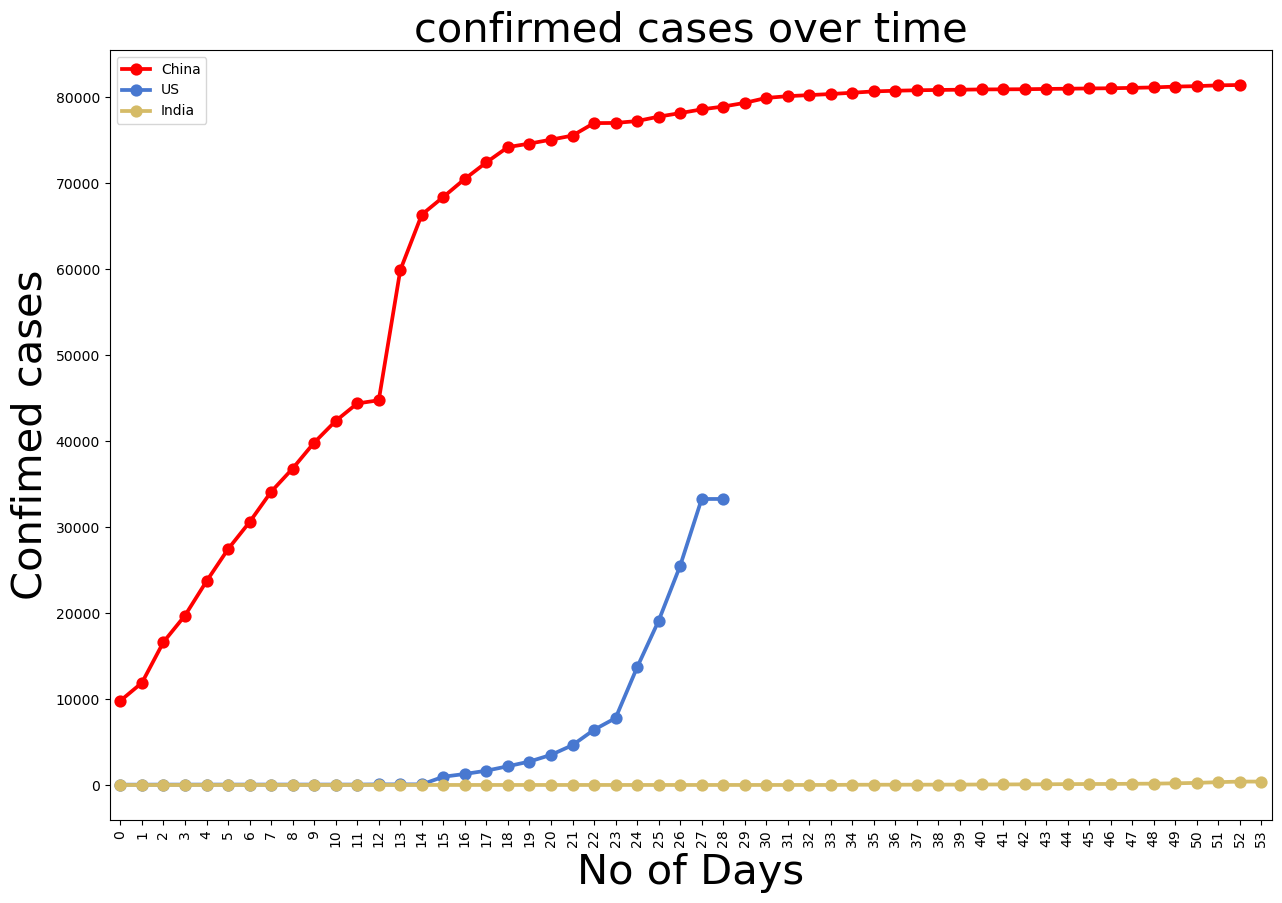

In [184]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.pointplot(x=china.index,y=china.confirmed,color='red',label='China')
sns.pointplot(x=us.index,y=us.confirmed,color='b',label='US')
sns.pointplot(x=india.index,y=india.confirmed,color='y',label='India')

plt.title("confirmed cases over time",fontsize=30)
plt.xlabel("No of Days",fontsize=30)
plt.ylabel("Confimed cases",fontsize=30)
plt.legend()
plt.show()

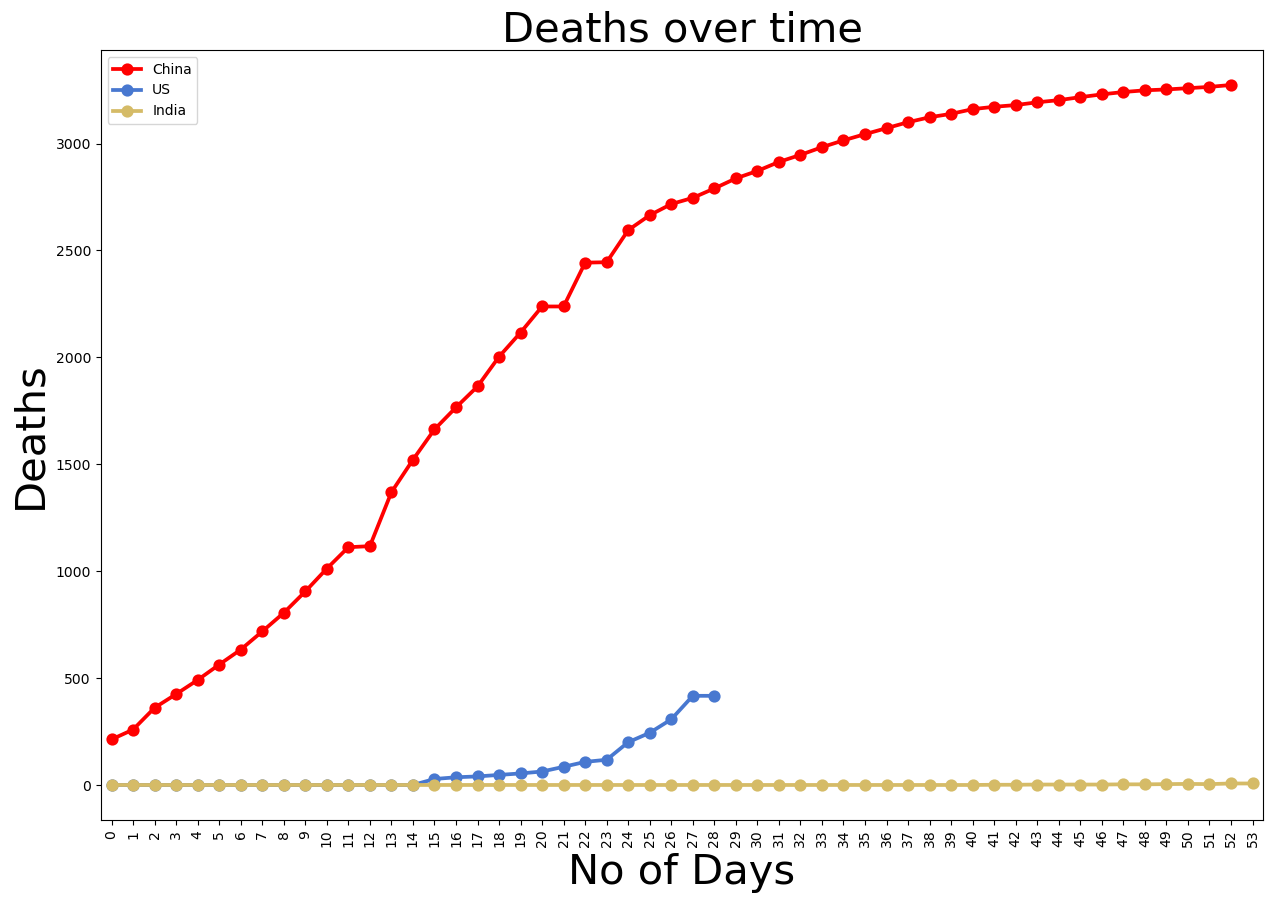

In [186]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.pointplot(x=china.index,y=china.deaths,color='red',label='China')
sns.pointplot(x=us.index,y=us.deaths,color='b',label='US')
sns.pointplot(x=india.index,y=india.deaths,color='y',label='India')

plt.title("Deaths over time",fontsize=30)
plt.xlabel("No of Days",fontsize=30)
plt.ylabel("Deaths",fontsize=30)
plt.legend()
plt.show()

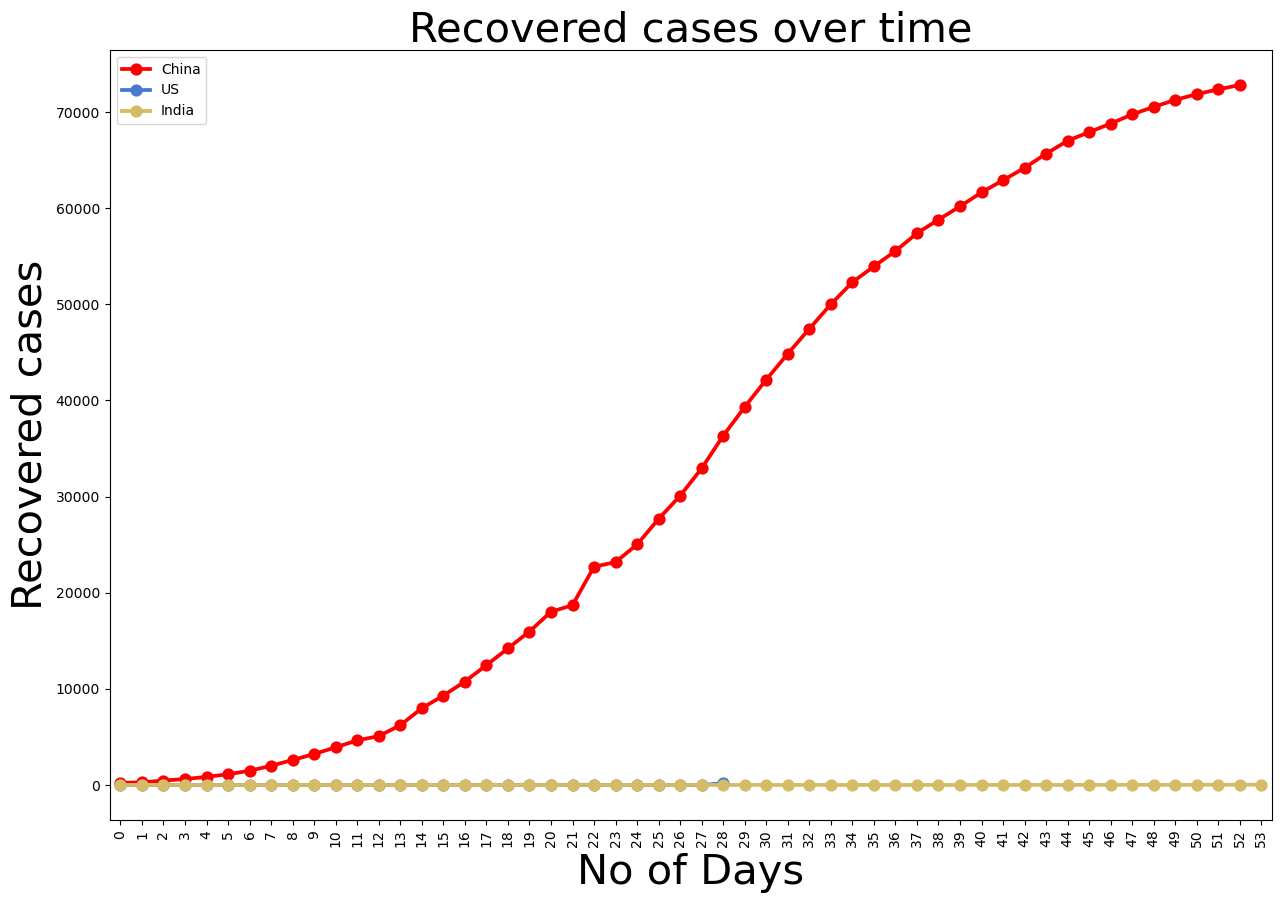

In [188]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.pointplot(x=china.index,y=china.recovered,color='red',label='China')
sns.pointplot(x=us.index,y=us.recovered,color='b',label='US')
sns.pointplot(x=india.index,y=india.recovered,color='y',label='India')

plt.title("Recovered cases over time",fontsize=30)
plt.xlabel("No of Days",fontsize=30)
plt.ylabel("Recovered cases",fontsize=30)
plt.legend()
plt.show()

# Detailed Analysis of COVID cases in India

In [8]:
df_india = pd.read_excel("../data/covid_india")
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [10]:
# total cases, including both native and foreign cases
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)']+df_india['Total Confirmed cases ( Foreign National )']

In [18]:
# The total active in India
df_india['Total Active'] = df_india['Total Cases']- ( df_india['Death']+df_india['Cured'])

total_active = df_india['Total Active'].sum()
print('Total no of Active covid cases across India:',total_active)

tot_cases = df_india[['Name of State / UT','Total Active']].groupby('Name of State / UT').sum().sort_values(by='Total Active',ascending= False)
tot_cases.head()

Total no of Active covid cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32


In [20]:
tot_cases.style.background_gradient(cmap='hot_r') #a heat map in the dframe itself

,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

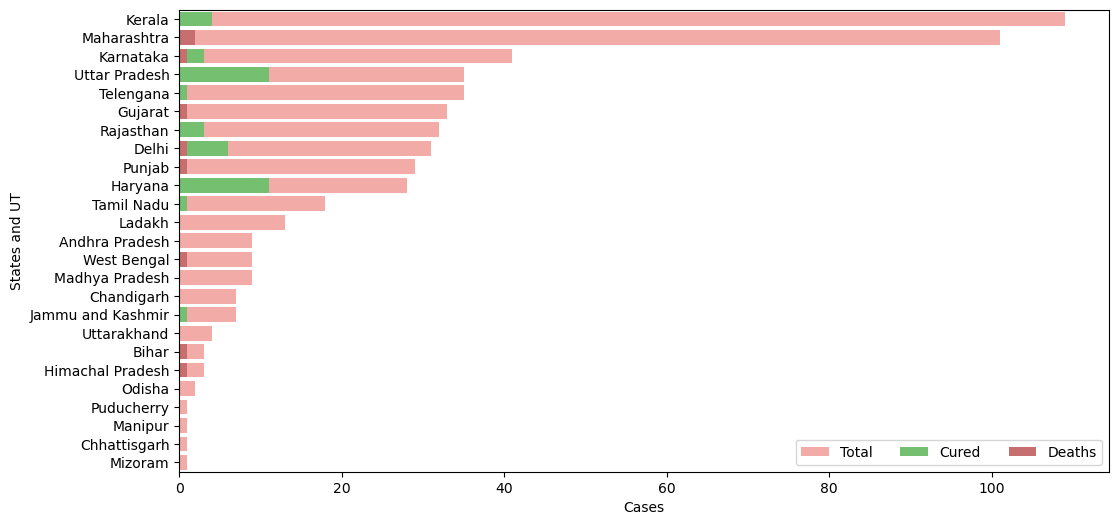

In [24]:
# state wise active cases over cured (stacked bar graph)
fig,ax = plt.subplots(figsize=(12,6))
tdf = df_india[['Name of State / UT','Total Cases','Cured','Death']]
tdf.sort_values('Total Cases',ascending = False,inplace=True)

sns.set_color_codes('pastel')
sns.barplot(x='Total Cases',y='Name of State / UT',data=tdf, label="Total",color='r')

sns.set_color_codes('muted')
sns.barplot(x='Cured',y='Name of State / UT',data=tdf, label='Cured',color='g')

sns.set_color_codes('muted')
sns.barplot(x='Death',y='Name of State / UT',data=tdf,label='Deaths',color='r')

ax.legend(ncol = 3, loc ="lower right",frameon=True)
ax.set(ylabel ="States and UT",xlabel='Cases')

In [26]:
perday= pd.read_excel("../data/per_day_cases.xlsx",parse_dates=['Date'],sheet_name="India")
perday.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


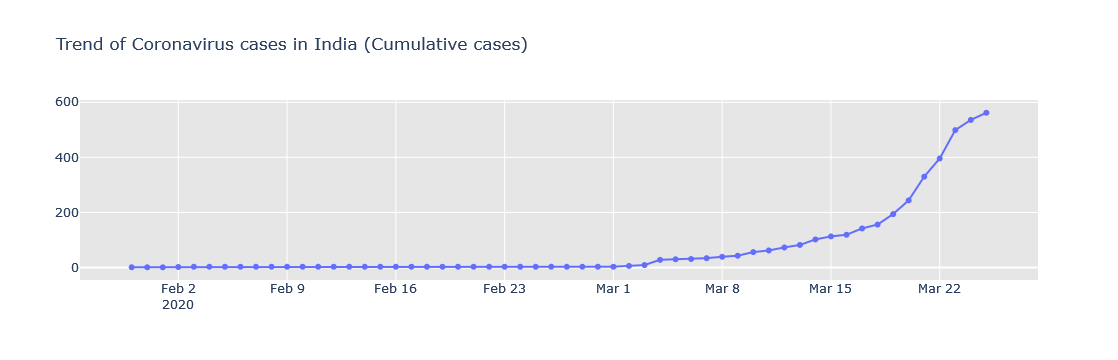

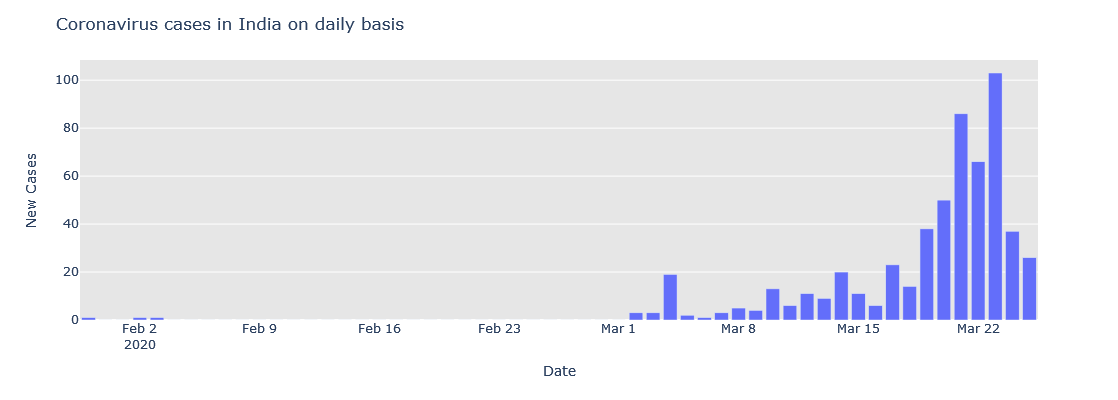

In [34]:
# a dynamic scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=perday["Date"],y=perday['Total Cases'],mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative cases)',plot_bgcolor='rgb(230,230,230)')
fig.show()

# a dynamic barplot
fig= px.bar(perday,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis',plot_bgcolor='#e6e6e6')
fig.show()

# Insights into COVID cases globally

In [38]:
df_confirmed =pd.read_csv('../data/covid_ConfirmedGlobal')
df_recovered= pd.read_csv('../data/covid_RecoveredGlobal')
df_deaths = pd.read_csv('../data/covid_ConfirmedDeathsGlobal')

df_confirmed.rename(columns={'Country/Region':'country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'country'},inplace=True)

In [40]:
df_confirmed.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [42]:
df_recovered.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [44]:
df_deaths.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
covid_data = pd.read_csv("../data/covid_CleanComplete.txt",parse_dates=['Date'])
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [66]:
cvd = covid_data[['Date','Province/State','Country/Region','Confirmed','Deaths','Recovered']].groupby(['Date','Country/Region','Province/State'])
cvd.head()

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
5,2020-01-22,British Columbia,Canada,0.0,0.0,0.0
6,2020-01-22,New South Wales,Australia,0.0,0.0,0.0
7,2020-01-22,Victoria,Australia,0.0,0.0,0.0
8,2020-01-22,Queensland,Australia,0.0,0.0,0.0
19,2020-01-22,South Australia,Australia,0.0,0.0,0.0
...,...,...,...,...,...,...
19191,2020-03-23,Sint Maarten,Netherlands,1.0,0.0,0.0
19194,2020-03-23,Isle of Man,United Kingdom,5.0,0.0,0.0
19196,2020-03-23,Northwest Territories,Canada,1.0,0.0,0.0
19210,2020-03-23,United States Virgin Islands,US,6.0,0.0,0.0


In [289]:
df_india_cases = covid_data.query('`Country/Region` == "India"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()

# creating separate frames for confirmed/deaths/recovered- INDIA ONLY
ind_confirmed, ind_deaths, ind_recovered = df_india_cases[['Date','Confirmed']], df_india_cases[['Date','Deaths']], df_india_cases[['Date','Recovered']]

In [102]:
# global cases
confirmed = covid_data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = covid_data.groupby('Date').sum()['Deaths'].reset_index()
recovered = covid_data.groupby('Date').sum()['Recovered'].reset_index()

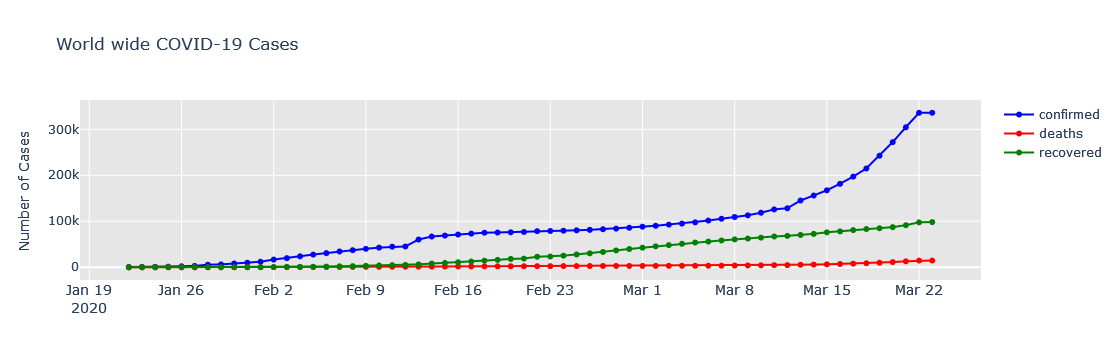

In [126]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode='lines+markers',name='deaths',line=dict(color='red')))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='recovered',line=dict(color='green')))
fig.update_layout(title_text='World wide COVID-19 Cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'),plot_bgcolor='#e6e6e6')
fig.show()

# Time series analysis 

In [128]:
from prophet import Prophet

## Confirmed Cases data

In [389]:
confirmed.columns = ['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])

In [391]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(confirmed)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

15:07:09 - cmdstanpy - INFO - Chain [1] start processing
15:07:09 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [392]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-7287.624356,-29167.865856,10874.932627,-7287.624356,-7287.624356,-2198.640092,-2198.640092,-2198.640092,-2198.640092,-2198.640092,-2198.640092,0.0,0.0,0.0,-9486.264448
1,2020-01-23,-4596.761110,-25544.239382,14604.277248,-4596.761110,-4596.761110,-1391.183570,-1391.183570,-1391.183570,-1391.183570,-1391.183570,-1391.183570,0.0,0.0,0.0,-5987.944679
2,2020-01-24,-1905.897863,-21544.325656,18528.356738,-1905.897863,-1905.897863,399.346517,399.346517,399.346517,399.346517,399.346517,399.346517,0.0,0.0,0.0,-1506.551345
3,2020-01-25,784.965391,-17859.869551,21748.583590,784.965391,784.965391,1531.061439,1531.061439,1531.061439,1531.061439,1531.061439,1531.061439,0.0,0.0,0.0,2316.026831
4,2020-01-26,3475.828646,-12976.861926,27443.689498,3475.828646,3475.828646,2856.133683,2856.133683,2856.133683,2856.133683,2856.133683,2856.133683,0.0,0.0,0.0,6331.962329


In [393]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.949580,333604.366191,373914.199850
65,2020-03-27,372235.404248,351404.834617,393923.355631
66,2020-03-28,388675.043750,369192.758824,410787.233368
67,2020-03-29,405308.040574,383848.183040,428055.844600
68,2020-03-30,418529.738247,396865.517006,441884.509777


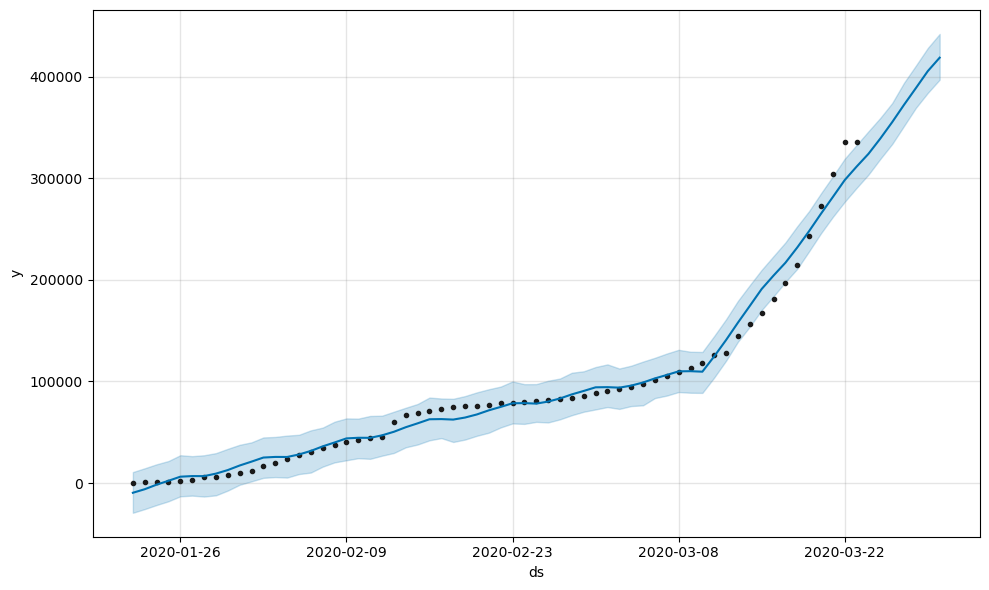

In [394]:
confirmed_forecast_plot = m.plot(forecast)

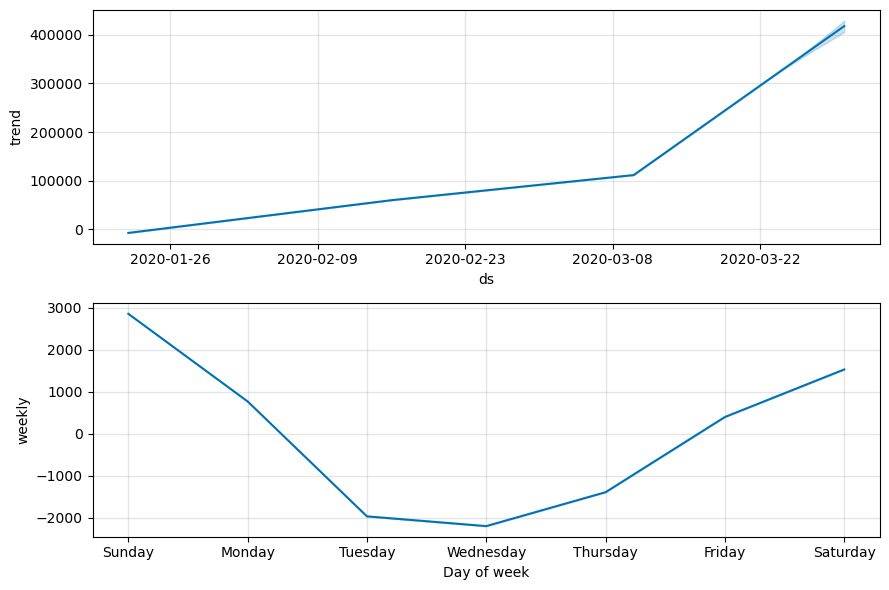

In [395]:
confirmed_complot = m.plot_components(forecast)

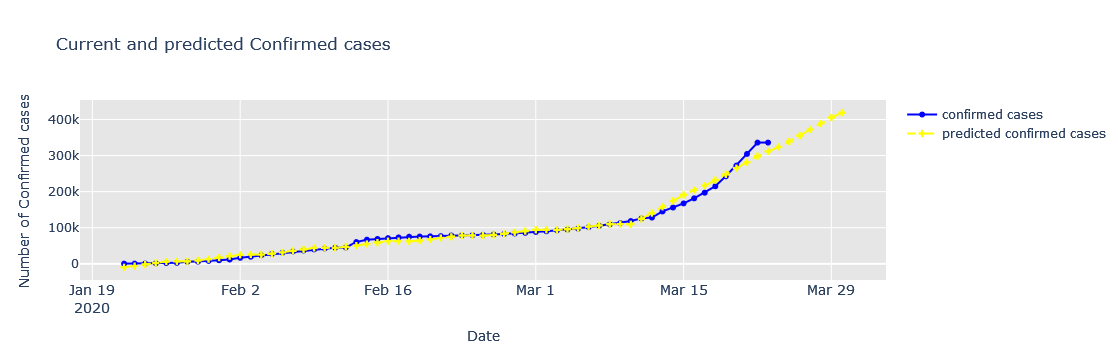

In [400]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['ds'],y=confirmed['y'],mode='lines+markers',name='confirmed cases',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted confirmed cases',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted Confirmed cases',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of Confirmed cases'),plot_bgcolor='#e6e6e6')
fig.show()

## Fatal Cases (deaths) data

In [375]:
deaths.columns = ['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [377]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(deaths)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

15:06:51 - cmdstanpy - INFO - Chain [1] start processing
15:06:51 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [378]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-454.262468,-1383.530517,360.450525,-454.262468,-454.262468,-60.392803,-60.392803,-60.392803,-60.392803,-60.392803,-60.392803,0.0,0.0,0.0,-514.655271
1,2020-01-23,-366.781105,-1323.221607,463.590326,-366.781105,-366.781105,-84.672855,-84.672855,-84.672855,-84.672855,-84.672855,-84.672855,0.0,0.0,0.0,-451.453959
2,2020-01-24,-279.299742,-1210.414104,627.940757,-279.299742,-279.299742,-29.865723,-29.865723,-29.865723,-29.865723,-29.865723,-29.865723,0.0,0.0,0.0,-309.165464
3,2020-01-25,-191.818357,-1165.721421,800.075574,-191.818357,-191.818357,44.488097,44.488097,44.488097,44.488097,44.488097,44.488097,0.0,0.0,0.0,-147.330259
4,2020-01-26,-104.336972,-891.153375,1012.911335,-104.336972,-104.336972,136.155789,136.155789,136.155789,136.155789,136.155789,136.155789,0.0,0.0,0.0,31.818817


In [379]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.895821,14453.957321,16394.265260
65,2020-03-27,16199.637166,15239.887688,17170.137277
66,2020-03-28,17006.925198,16014.481088,18038.957024
67,2020-03-29,17831.527103,16820.607568,18904.069172
68,2020-03-30,18491.009178,17406.626031,19610.672227


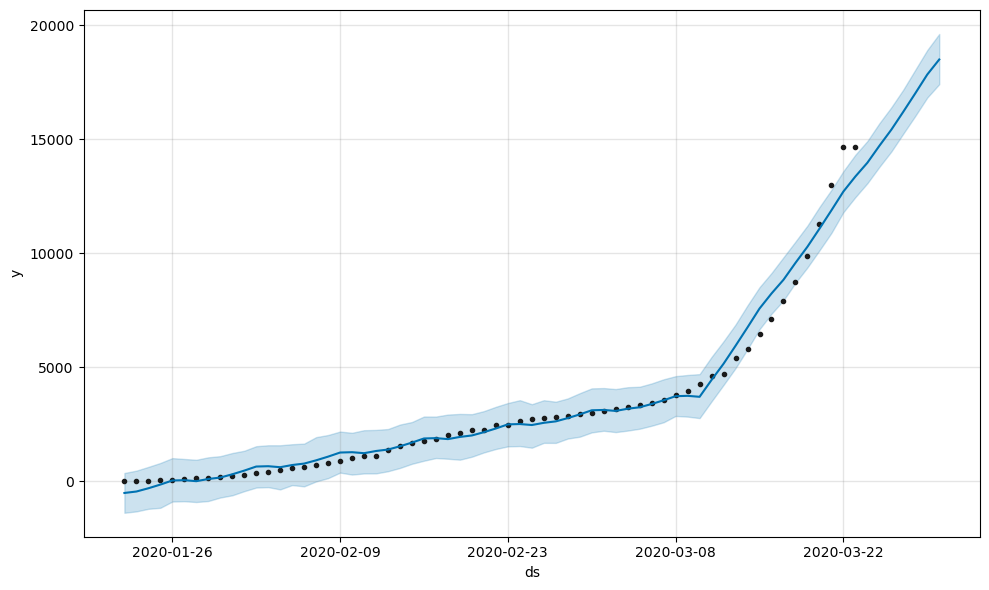

In [381]:
deaths_forecast_plot = m.plot(forecast)

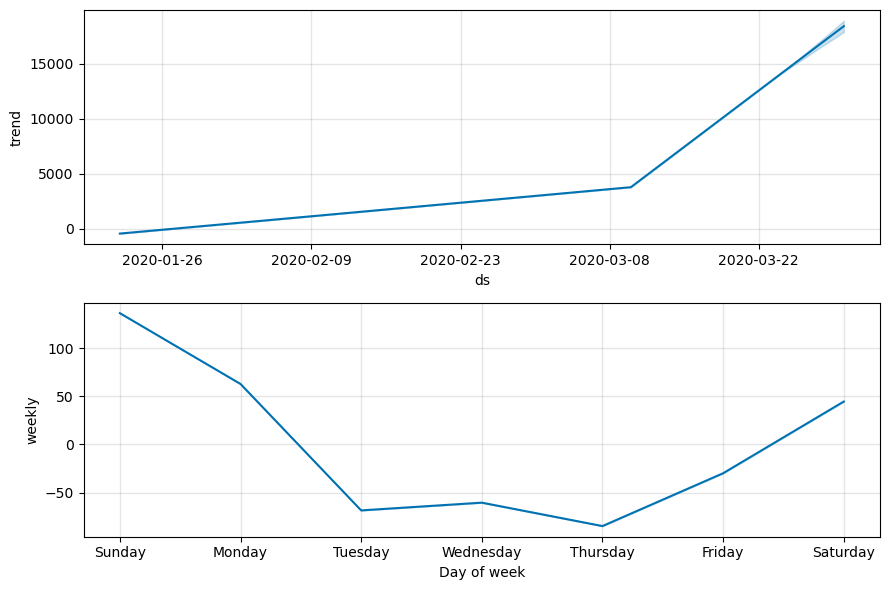

In [383]:
deaths_complot = m.plot_components(forecast)

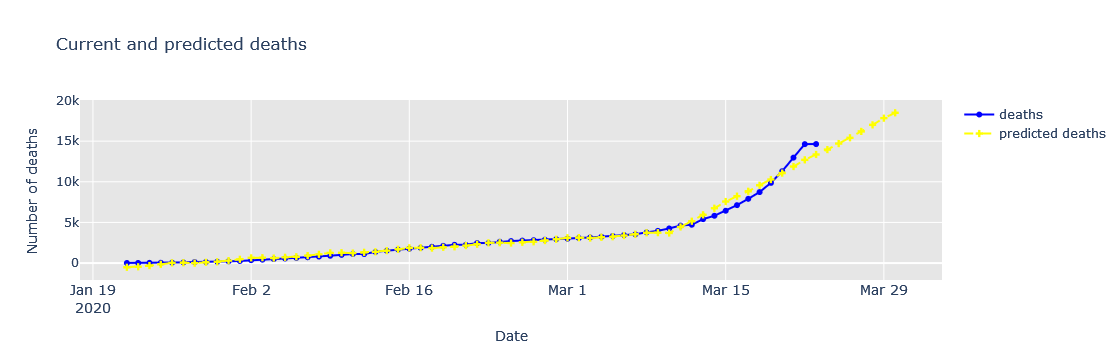

In [386]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=deaths['ds'],y=deaths['y'],mode='lines+markers',name='deaths',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted deaths',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted deaths',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of deaths'),plot_bgcolor='#e6e6e6')
fig.show()

## Recovered Cases data

In [361]:
recovered.columns = ['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])

In [363]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(recovered)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

15:06:40 - cmdstanpy - INFO - Chain [1] start processing
15:06:40 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [364]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-236.568004,-1873.952581,1116.759258,-236.568004,-236.568004,-142.236777,-142.236777,-142.236777,-142.236777,-142.236777,-142.236777,0.0,0.0,0.0,-378.804781
1,2020-01-23,-163.422339,-1840.007500,995.977662,-163.422339,-163.422339,-314.992132,-314.992132,-314.992132,-314.992132,-314.992132,-314.992132,0.0,0.0,0.0,-478.414471
2,2020-01-24,-90.276673,-2045.880509,1127.777649,-90.276673,-90.276673,-394.281852,-394.281852,-394.281852,-394.281852,-394.281852,-394.281852,0.0,0.0,0.0,-484.558525
3,2020-01-25,-17.131005,-1350.868112,1799.118351,-17.131005,-17.131005,104.610182,104.610182,104.610182,104.610182,104.610182,104.610182,0.0,0.0,0.0,87.479176
4,2020-01-26,56.014662,-1040.238901,2112.393538,56.014662,56.014662,548.171891,548.171891,548.171891,548.171891,548.171891,548.171891,0.0,0.0,0.0,604.186554


In [365]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103261.024471,101491.643438,105119.800984
65,2020-03-27,105630.560323,103680.005675,107490.815549
66,2020-03-28,108578.277929,106415.300553,110605.495041
67,2020-03-29,111470.665211,109174.051397,113740.261619
68,2020-03-30,113631.008244,110669.860500,116480.373988


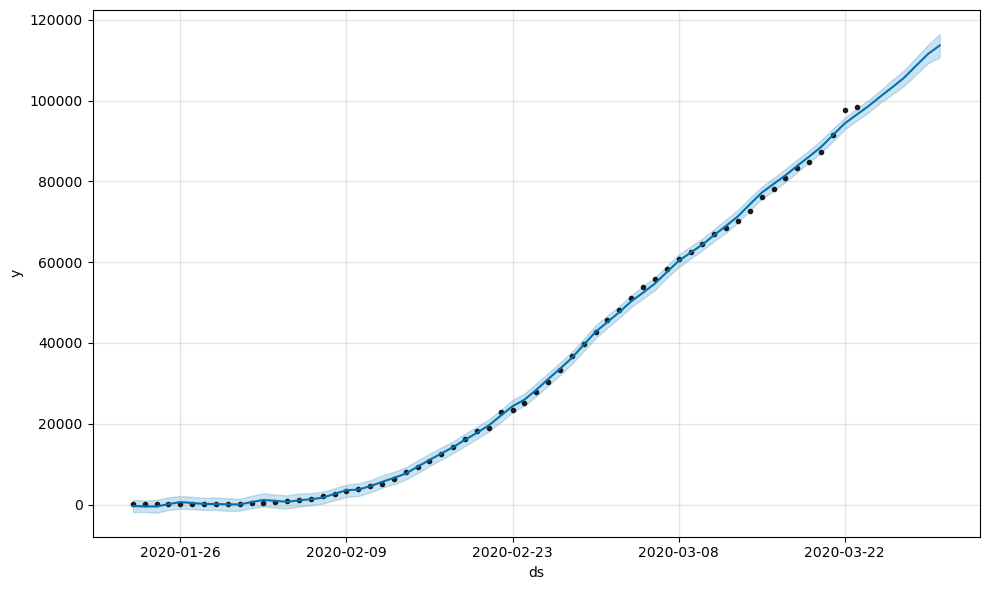

In [366]:
recovered_forecast_plot = m.plot(forecast)

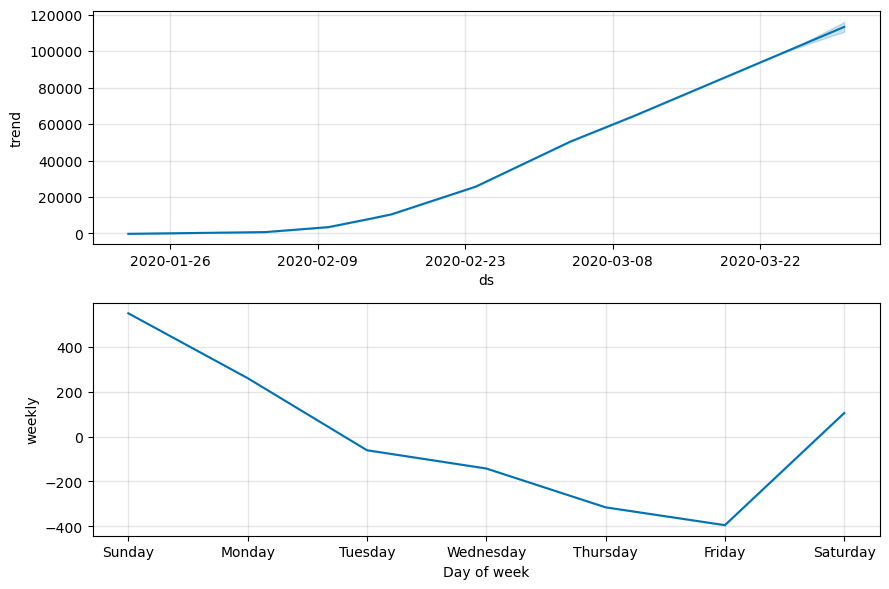

In [370]:
recovered_complot = m.plot_components(forecast)

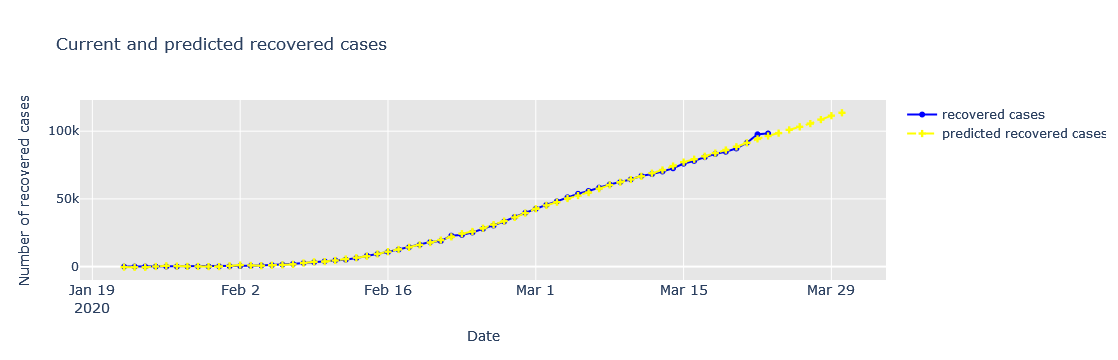

In [373]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=recovered['ds'],y=recovered['y'],mode='lines+markers',name='recovered cases',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted recovered cases',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted recovered cases',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of recovered cases'),plot_bgcolor='#e6e6e6')
fig.show()

# Analysis of Indian COVID Scenario

## Confirmed

In [333]:
ind_confirmed.columns = ['ds','y']
ind_confirmed['ds']=pd.to_datetime(ind_confirmed['ds'])

In [335]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(ind_confirmed)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

15:05:11 - cmdstanpy - INFO - Chain [1] start processing
15:05:12 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [337]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-58.331592,-194.829504,63.638167,-58.331592,-58.331592,-7.269449,-7.269449,-7.269449,-7.269449,-7.269449,-7.269449,0.0,0.0,0.0,-65.601041
1,2020-01-23,-54.974265,-185.097583,65.544924,-54.974265,-54.974265,-4.870099,-4.870099,-4.870099,-4.870099,-4.870099,-4.870099,0.0,0.0,0.0,-59.844364
2,2020-01-24,-51.616938,-180.068701,70.883971,-51.616938,-51.616938,-1.583125,-1.583125,-1.583125,-1.583125,-1.583125,-1.583125,0.0,0.0,0.0,-53.200063
3,2020-01-25,-48.259611,-174.680082,84.379171,-48.259611,-48.259611,7.148287,7.148287,7.148287,7.148287,7.148287,7.148287,0.0,0.0,0.0,-41.111324
4,2020-01-26,-44.902284,-153.303793,90.548903,-44.902284,-44.902284,12.989215,12.989215,12.989215,12.989215,12.989215,12.989215,0.0,0.0,0.0,-31.913070


In [339]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,153.433398,21.932743,279.834414
65,2020-03-27,160.140573,27.045135,295.180828
66,2020-03-28,172.292186,49.877209,300.169604
67,2020-03-29,181.553314,54.259379,314.572866
68,2020-03-30,183.035794,60.901813,308.899766


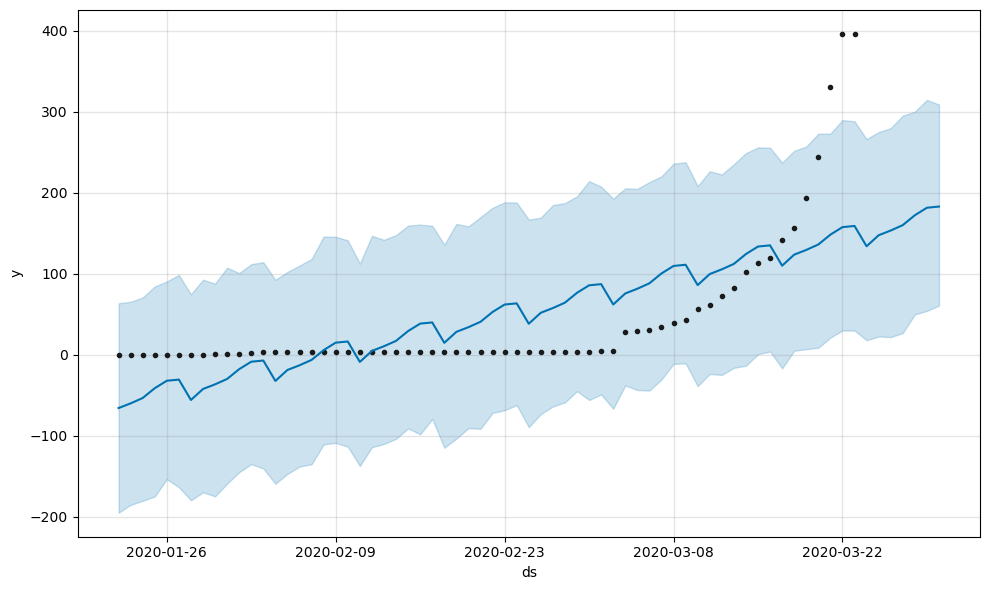

In [341]:
ind_confirmed_forecast_plot = m.plot(forecast)

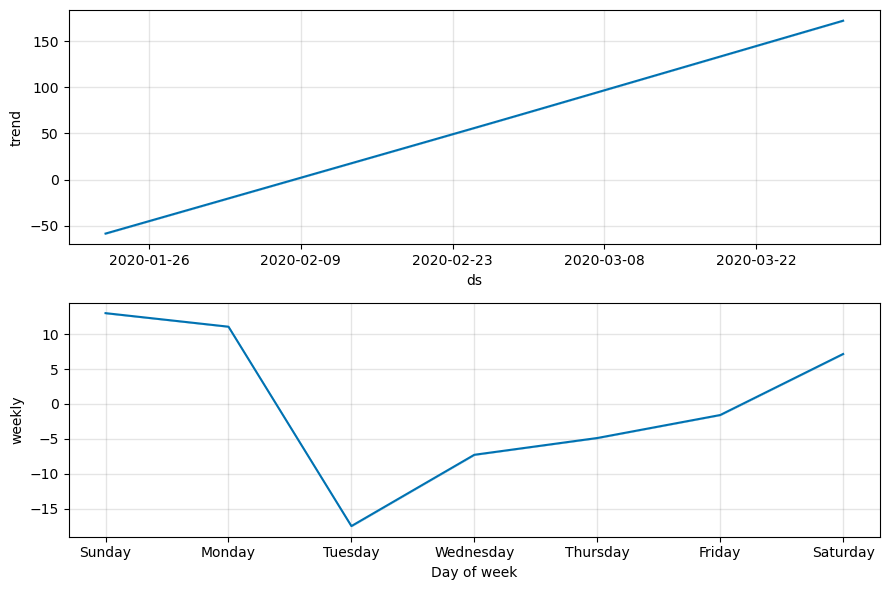

In [343]:
ind_confirmed_complot = m.plot_components(forecast)

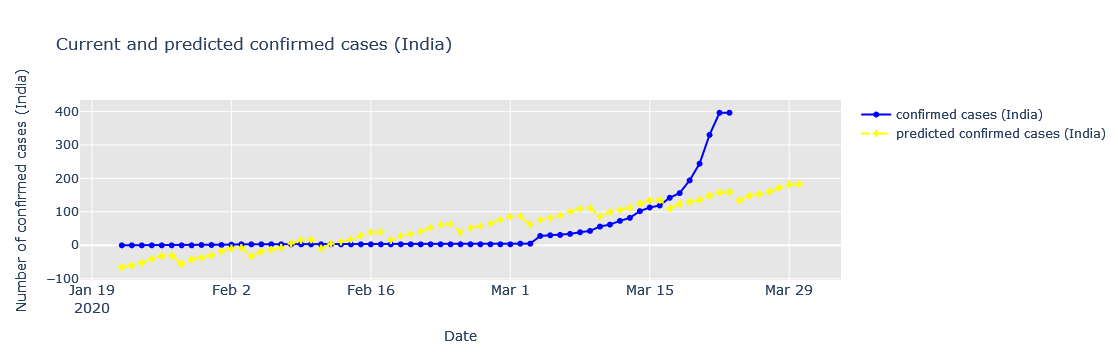

In [345]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind_confirmed['ds'],y=ind_confirmed['y'],mode='lines+markers',name='confirmed cases (India)',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted confirmed cases (India)',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted confirmed cases (India)',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of confirmed cases (India)'),plot_bgcolor='#e6e6e6')
fig.show()

## Deaths

In [319]:
ind_deaths.columns = ['ds','y']
ind_deaths['ds']=pd.to_datetime(ind_deaths['ds'])

In [321]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(ind_deaths)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

15:04:45 - cmdstanpy - INFO - Chain [1] start processing
15:04:45 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [323]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.048313,-3.391858,1.107345,-1.048313,-1.048313,-0.101447,-0.101447,-0.101447,-0.101447,-0.101447,-0.101447,0.0,0.0,0.0,-1.149760
1,2020-01-23,-0.991431,-3.510366,1.545226,-0.991431,-0.991431,-0.047396,-0.047396,-0.047396,-0.047396,-0.047396,-0.047396,0.0,0.0,0.0,-1.038827
2,2020-01-24,-0.934550,-3.214630,1.611257,-0.934550,-0.934550,0.117753,0.117753,0.117753,0.117753,0.117753,0.117753,0.0,0.0,0.0,-0.816797
3,2020-01-25,-0.877668,-3.267063,1.475976,-0.877668,-0.877668,-0.050428,-0.050428,-0.050428,-0.050428,-0.050428,-0.050428,0.0,0.0,0.0,-0.928096
4,2020-01-26,-0.820786,-3.002389,1.732095,-0.820786,-0.820786,0.225821,0.225821,0.225821,0.225821,0.225821,0.225821,0.0,0.0,0.0,-0.594966


In [325]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,2.561540,0.203944,5.021053
65,2020-03-27,2.784176,0.269058,5.176153
66,2020-03-28,2.673482,0.297460,5.073596
67,2020-03-29,3.007218,0.805315,5.279428
68,2020-03-30,3.007621,0.726253,5.389834


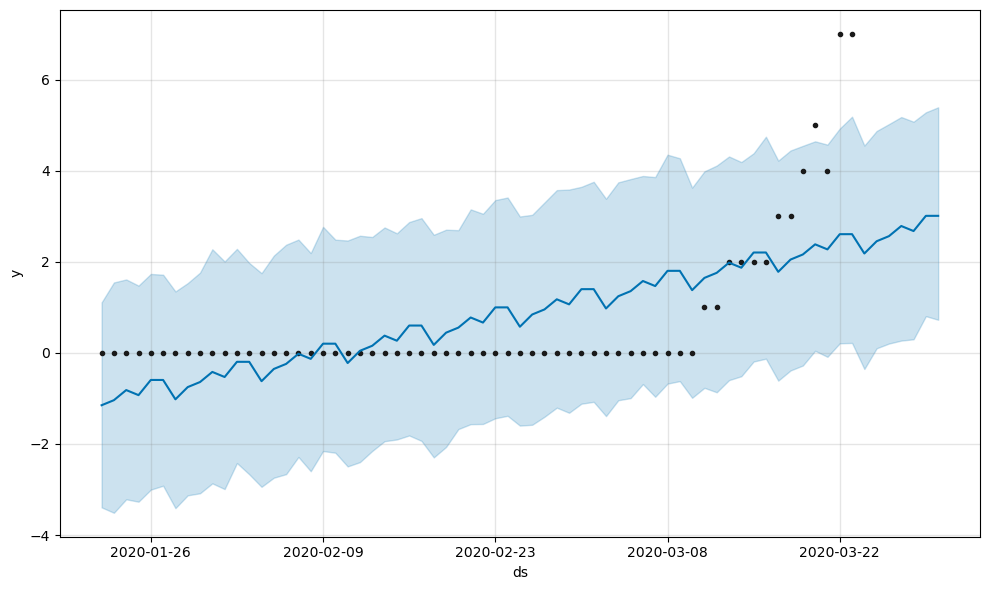

In [327]:
ind_deaths_forecast_plot = m.plot(forecast)

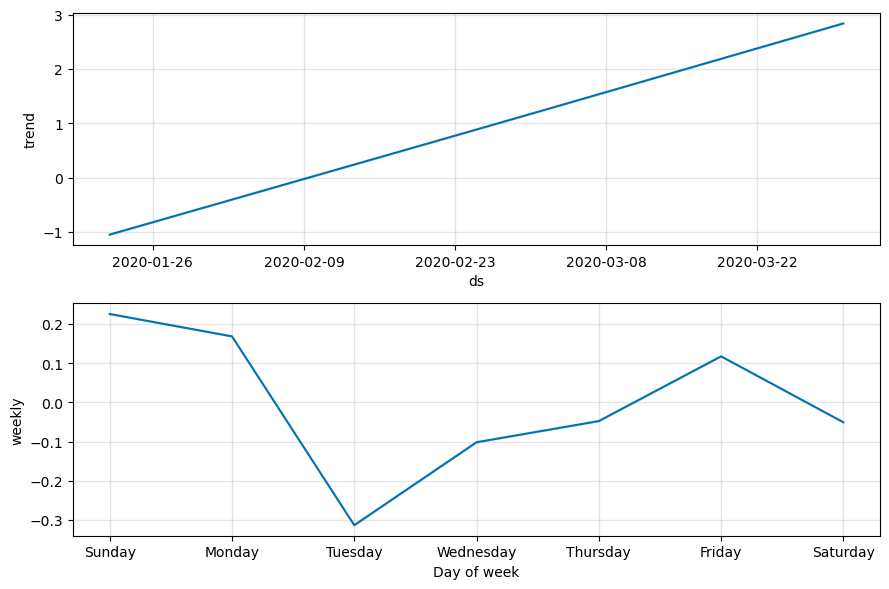

In [329]:
ind_deaths_complot = m.plot_components(forecast)

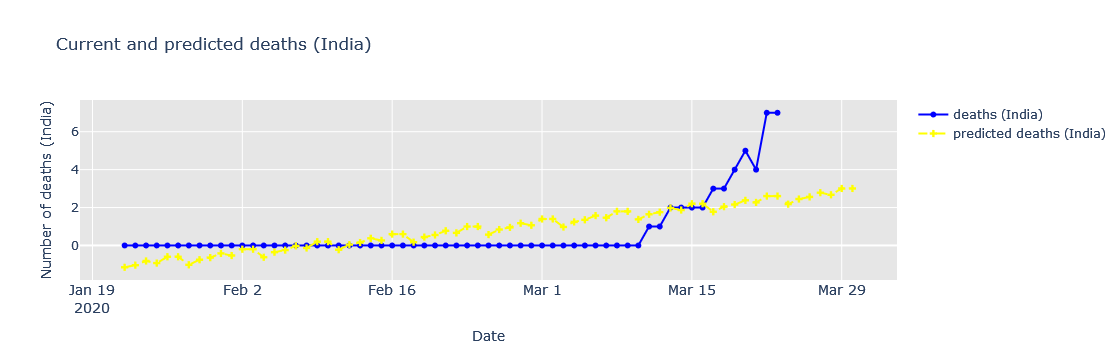

In [330]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind_deaths['ds'],y=ind_deaths['y'],mode='lines+markers',name='deaths (India)',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted deaths (India)',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted deaths (India)',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of deaths (India)'),plot_bgcolor='#e6e6e6')
fig.show()

## Recovered

In [303]:
ind_recovered.columns = ['ds','y']
ind_recovered['ds']=pd.to_datetime(ind_recovered['ds'])

In [305]:
#fitting the confirmed dataframe
m = Prophet(interval_width = 0.95)
m.fit(ind_recovered)

#creating future time-intervals to predict values upon
future= m.make_future_dataframe(periods=7)
future.tail()

14:57:15 - cmdstanpy - INFO - Chain [1] start processing
14:57:15 - cmdstanpy - INFO - Chain [1] done processing


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [307]:
#forecasting future 'confirmed cases'
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3.922965,-12.892105,3.872647,-3.922965,-3.922965,-0.442367,-0.442367,-0.442367,-0.442367,-0.442367,-0.442367,0.0,0.0,0.0,-4.365332
1,2020-01-23,-3.660174,-13.235654,4.205085,-3.660174,-3.660174,-0.594834,-0.594834,-0.594834,-0.594834,-0.594834,-0.594834,0.0,0.0,0.0,-4.255008
2,2020-01-24,-3.397383,-12.402740,4.621270,-3.397383,-3.397383,-0.302864,-0.302864,-0.302864,-0.302864,-0.302864,-0.302864,0.0,0.0,0.0,-3.700247
3,2020-01-25,-3.134592,-11.481861,5.113474,-3.134592,-3.134592,-0.233173,-0.233173,-0.233173,-0.233173,-0.233173,-0.233173,0.0,0.0,0.0,-3.367765
4,2020-01-26,-2.871801,-9.785406,6.428844,-2.871801,-2.871801,1.280927,1.280927,1.280927,1.280927,1.280927,1.280927,0.0,0.0,0.0,-1.590874


In [309]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,12.347320,4.038578,20.955677
65,2020-03-27,12.904069,4.277393,21.246202
66,2020-03-28,13.238539,5.080644,21.593749
67,2020-03-29,15.017419,6.660163,23.644271
68,2020-03-30,15.018438,6.461066,23.551903


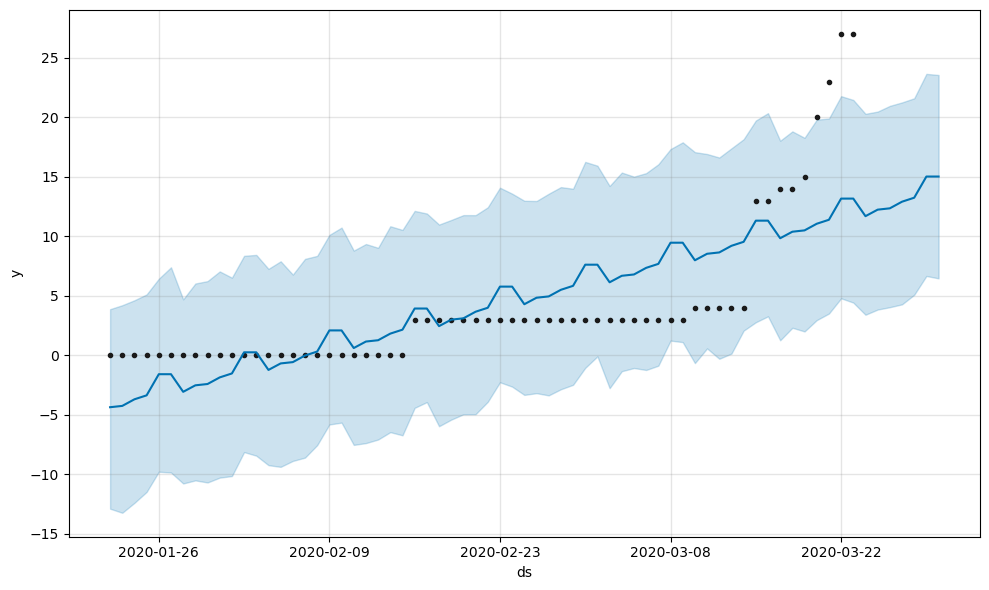

In [311]:
ind_recovered_forecast_plot = m.plot(forecast)

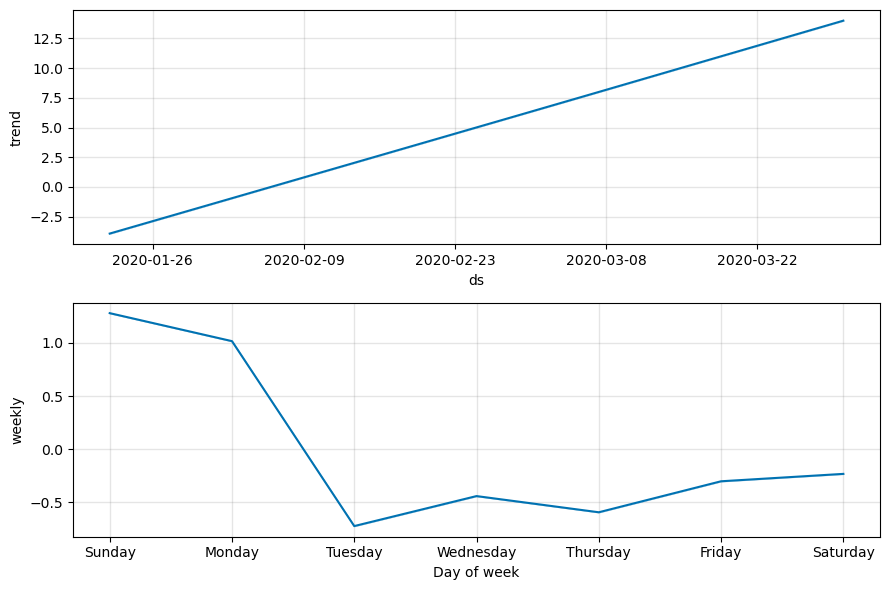

In [317]:
ind_recovered_complot = m.plot_components(forecast)

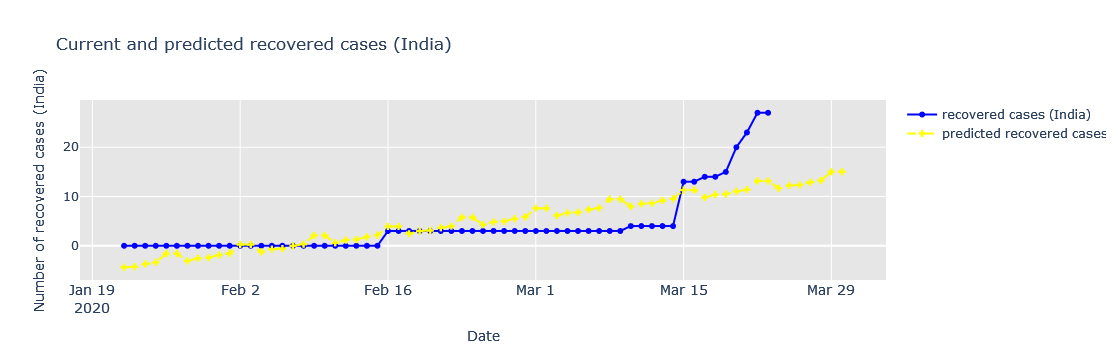

In [313]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind_recovered['ds'],y=ind_recovered['y'],mode='lines+markers',name='recovered cases (India)',line=dict(color='blue',dash='solid')))
fig.add_trace(go.Scatter(x=future.ds.dt.date,y=forecast.yhat,mode='lines+markers',name='predicted recovered cases',line=dict(color='yellow',dash='dash'),marker_symbol='cross'))
fig.update_layout(title_text='Current and predicted recovered cases (India)',xaxis=dict(title='Date'),xaxis_tickfont_size=14,yaxis=dict(title='Number of recovered cases (India)'),plot_bgcolor='#e6e6e6')
fig.show()